In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
df=pd.read_csv("student_data_synthetic_extreme_noisy (1).csv")

In [5]:
df.head()

,Marks 1,Marks 2,Admission
0,92.934283,79.481679,1
1,51.234714,56.298354,0
2,74.953771,53.461560,1
3,68.460597,50.233526,0
4,78.316933,83.619990,1


In [7]:
df.tail()

,Marks 1,Marks 2,Admission
45,67.603116,31.729701,1
46,20.787225,73.922406,0
47,83.142445,81.221105,1
48,81.872366,90.102269,1
49,19.739197,59.308257,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Marks 1    50 non-null     float64
 1   Marks 2    50 non-null     float64
 2   Admission  50 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 1.3 KB


In [11]:
feature_cols=['Marks 1', 'Marks 2']
x=df[feature_cols]
y=df.Admission

In [13]:
class_counts=df["Admission"].value_counts()
print(class_counts)

1    35
0    15
Name: Admission, dtype: int64


<Axes: xlabel='Marks 1', ylabel='Marks 2'>

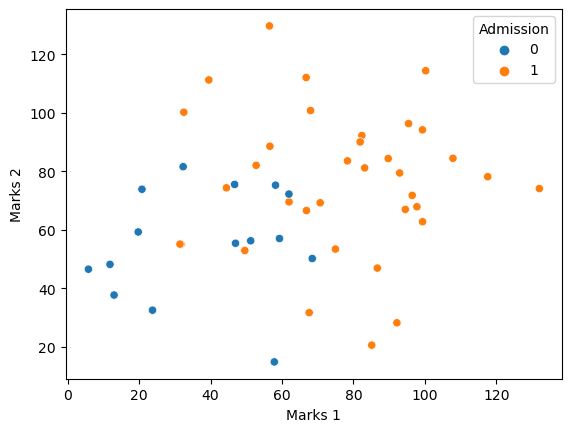

In [15]:
import seaborn as sns
sns.scatterplot(x=df["Marks 1"], y=df["Marks 2"], hue=df["Admission"])

In [17]:
print(x.head())

     Marks 1    Marks 2
0  92.934283  79.481679
1  51.234714  56.298354
2  74.953771  53.461560
3  68.460597  50.233526
4  78.316933  83.619990


In [19]:
print(y.head())

0    1
1    0
2    1
3    0
4    1
Name: Admission, dtype: int64


In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0,stratify=y)
x_train.shape

(37, 2)

In [23]:
x_test.shape

(13, 2)

In [33]:
m1=LogisticRegression(class_weight='balanced',penalty='l2',solver='lbfgs',max_iter=1000)
m1.fit(x_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [35]:
m1.score(x_test,y_test)

0.9230769230769231

In [37]:
from sklearn.model_selection import cross_val_score
cv_scores=cross_val_score(m1,x,y,cv=5)
print('Cross-Validation Accuracy:',np.mean(cv_scores))

Cross-Validation Accuracy: 0.78


In [39]:
y_pred=m1.predict(x_test)
y_test

17    0
2     1
20    1
31    1
24    1
1     0
12    0
8     1
11    1
34    1
33    1
43    0
13    1
Name: Admission, dtype: int64

In [43]:
y_pred=m1.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

In [45]:
new_pred=m1.predict([[60,70]])
new_pred

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [47]:
c1 = metrics.confusion_matrix(y_pred, y_test)
print(c1)

print("actual correct matrix")
tp=c1[1][1]
tn=c1[0][0]
fp=c1[0][1]
fn=c1[1][0]
print(np.array([tp,fn,fp,tn]))

[[4 1]
 [0 8]]
actual correct matrix
[8 0 1 4]


In [49]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9230769230769231
Precision: 1.0
Recall: 0.8888888888888888


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


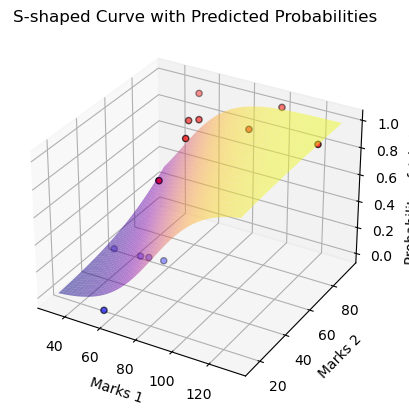

In [53]:
marks1_values = np.linspace(x_test['Marks 1'].min(), x_test['Marks 1'].max(), 100)
marks2_values = np.linspace(x_test['Marks 2'].min(), x_test['Marks 2'].max(), 100)
marks1_mesh, marks2_mesh = np.meshgrid(marks1_values, marks2_values)
feature_grid = np.c_[marks1_mesh.ravel(), marks2_mesh.ravel()]

# Predict probabilities using the trained model
probabilities = m1.predict_proba(feature_grid)[:, 1].reshape(marks1_mesh.shape)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the S-shaped curve
ax.plot_surface(marks1_mesh, marks2_mesh, probabilities, cmap='plasma',alpha=0.5)

# Scatter plot the training data points
ax.scatter(x_test['Marks 1'], x_test['Marks 2'], y_pred, c=y_pred, cmap='bwr', edgecolors='k')
# Change the viewing angle

ax.set_xlabel('Marks 1')
ax.set_ylabel('Marks 2')
ax.set_zlabel('Probability of Admission')
ax.set_title('S-shaped Curve with Predicted Probabilities')
plt.show()

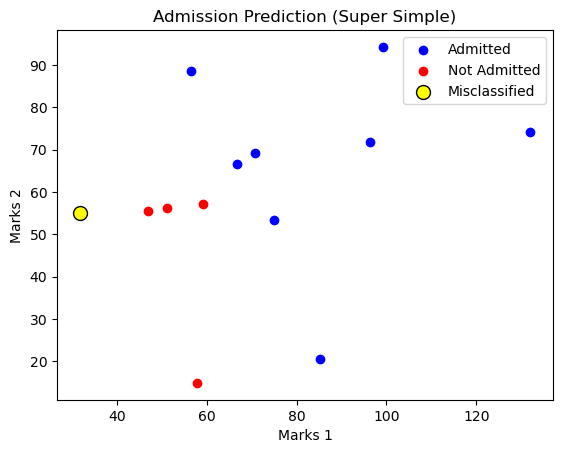

In [55]:
plt.scatter(x_test[y_pred==1]['Marks 1'], x_test[y_pred==1]['Marks 2'], color='blue', label='Admitted')

# Plot Not Admitted students (predicted correctly)
plt.scatter(x_test[y_pred==0]['Marks 1'], x_test[y_pred==0]['Marks 2'], color='red', label='Not Admitted')

# Plot Misclassified points (highlight in yellow)
misclassified = (y_test != y_pred)
plt.scatter(x_test[misclassified]['Marks 1'], x_test[misclassified]['Marks 2'], 
            color='yellow', edgecolor='k', s=100, label='Misclassified')

# Add labels and title
plt.xlabel('Marks 1')
plt.ylabel('Marks 2')
plt.title('Admission Prediction (Super Simple)')

# Add a simple legend
plt.legend()

# Show the plot
plt.show()